In [91]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import imghdr

In [92]:
import cv2

In [93]:
data_dir = "data"
image_extensions = ["jpeg", "jpg", "bmp", "png"] #List of allowed extensions

In [94]:
os.listdir(data_dir)

['Dogs', 'Cats']

In [95]:
cv2.imread(os.path.join(data_dir, "Dogs", "1752573485303.jpeg")).shape
#height, width, no_clr_channels
#This is 46 pixels high 69 pixels wide

(46, 69, 3)

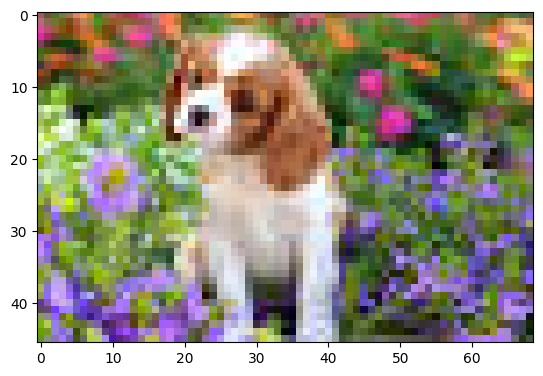

In [96]:
img = cv2.imread(os.path.join("data", "Dogs", "1752573485303.jpeg"))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#opencv uses bgr and matplotlib expects rgb so we are converting
plt.show()

In [98]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_extensions: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)



Loading our data

In [99]:
data = tf.keras.utils.image_dataset_from_directory("data")
#Builds us the dataset and does some preprocessing

Found 132 files belonging to 2 classes.


In [100]:
#The data is a generator so we will convert it to a numpy iterator
data_iterator = data.as_numpy_iterator()
#We will get consecutive batches from .next()

In [101]:
batch = data_iterator.next()
batch

(array([[[[ 71.     , 112.     ,  76.     ],
          [ 71.     , 112.     ,  76.     ],
          [ 71.     , 112.     ,  76.     ],
          ...,
          [ 71.     , 112.     ,  76.     ],
          [ 71.     , 112.     ,  76.     ],
          [ 71.     , 112.     ,  76.     ]],
 
         [[ 71.     , 112.     ,  76.     ],
          [ 71.     , 112.     ,  76.     ],
          [ 71.     , 112.     ,  76.     ],
          ...,
          [ 71.     , 112.     ,  76.     ],
          [ 71.     , 112.     ,  76.     ],
          [ 71.     , 112.     ,  76.     ]],
 
         [[ 71.     , 112.     ,  76.     ],
          [ 71.     , 112.     ,  76.     ],
          [ 71.     , 112.     ,  76.     ],
          ...,
          [ 71.     , 112.     ,  76.     ],
          [ 71.     , 112.     ,  76.     ],
          [ 71.     , 112.     ,  76.     ]],
 
         ...,
 
         [[ 71.     , 112.     ,  76.     ],
          [ 71.     , 112.     ,  76.     ],
          [ 71.     , 112.    

In [102]:
len(batch) #the images and the labels


2

In [103]:
batch[0].shape #We have to index the 0 as we want the shape of the images batch[1] wil refer to the labels

(32, 256, 256, 3)

In [104]:
batch[1]

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int32)

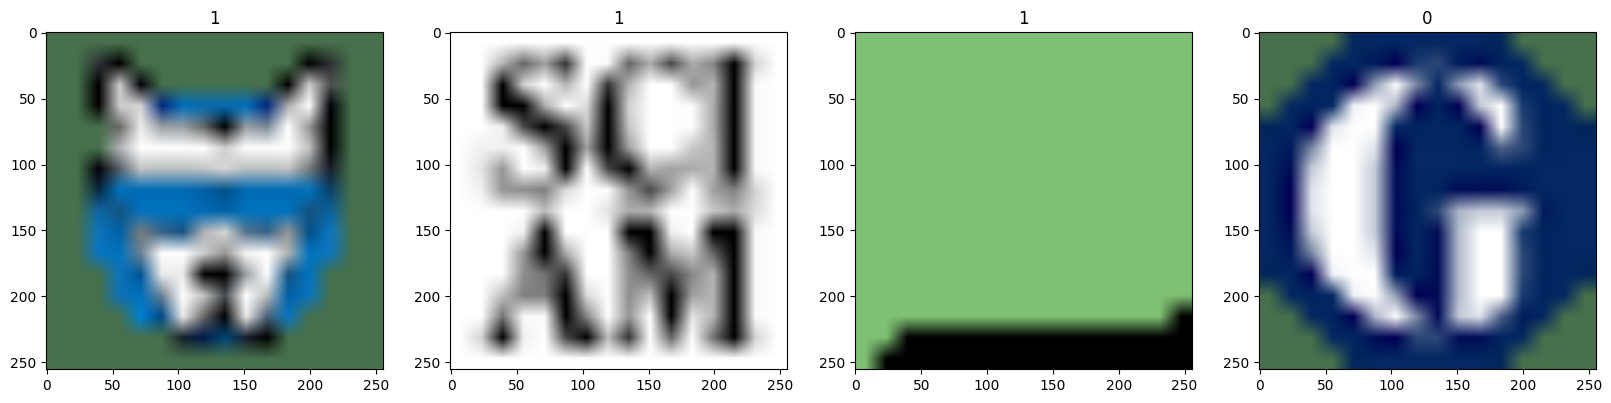

In [105]:
fig, ax = plt.subplots(ncols = 4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Preprocessing our data

In [106]:
data = data.map(lambda x,y: (x/255, y))
#Every time we fetch our data from the pipeline, it will scale our data between 0 and 1

In [107]:
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

In [108]:
batch[0].max()

np.float32(1.0)

Splitting our data 

In [ ]:
len(data) #5 batches

5

In [113]:
train_size = int(len(data) * .7)
val_size = int(len(data) * .2)
test_size = int(len(data) * .1) + 1 #Adding a one so all batches are used

train_size, val_size, test_size

(3, 1, 1)

In [ ]:
#Our data has already been shuffled so we aren't shuffling it here
train_data = data.take(train_size)
val_data = data.skip(train_size).take(val_size)
test_data = data.skip(train_size + val_size).take(test_size)

In [117]:
len(train_data), len(val_data), len(test_data)

(3, 1, 1)